In [2]:
# Dependencies
import pandas as pd

from sqlalchemy import create_engine
import pymysql
pymysql.install_as_MySQLdb()

from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy import create_engine

# Plotting dependencies
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Creating the engine to run queries
engine = create_engine('sqlite:///./Resources/hawaii.sqlite')
conn = engine.connect()

# Precipitation Analysis 

In [4]:
precipitation_data = pd.read_sql("SELECT date, prcp FROM measurements WHERE date BETWEEN '2017-07-17' AND '2018-07-16'", conn)
precipitation_data

,date,prcp
0,2017-07-17,0.03
1,2017-07-18,0.05
2,2017-07-20,0.03
3,2017-07-21,0.00
4,2017-07-22,0.03
5,2017-07-23,0.00
6,2017-07-24,0.05
7,2017-07-25,0.00
8,2017-07-26,0.00
9,2017-07-27,0.00


In [5]:
x = precipitation_data["date"]
prcp = precipitation_data["prcp"]

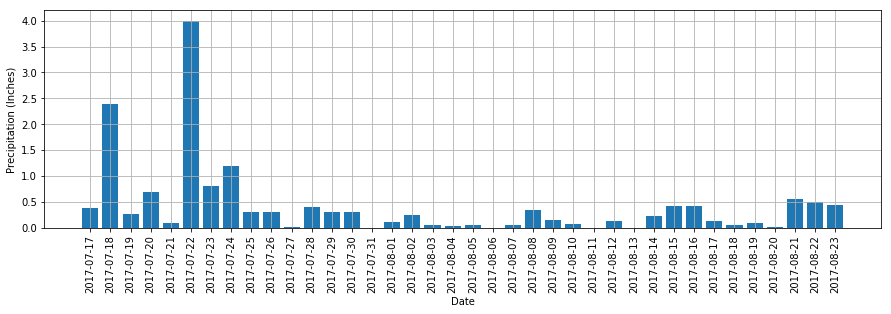

In [6]:
plt.figure(figsize=(15,4))
plt.bar(x, prcp, align="center")
plt.xticks(rotation="vertical")
plt.ylabel("Precipitation (Inches)")
plt.xlabel("Date")
plt.grid(True)
plt.show()

# Station Analysis

## Number of stations

In [7]:
number_of_stations = pd.read_sql("SELECT COUNT(station) AS 'Number of Stations' FROM stations", conn)
number_of_stations

,Number of Stations
0,9


## Most active stations 

In [8]:
most_active_stations = pd.read_sql("SELECT station AS 'Station', COUNT(station) AS 'Number of observations' FROM measurements GROUP BY station ORDER BY COUNT(station) DESC", conn)
most_active_stations

,Station,Number of observations
0,USC00519281,2772
1,USC00513117,2696
2,USC00519397,2685
3,USC00519523,2572
4,USC00516128,2484
5,USC00514830,1937
6,USC00511918,1932
7,USC00517948,683
8,USC00518838,342


## Temperature frequency

In [9]:
temp_obv_data= pd.read_sql("SELECT tobs, COUNT(tobs) AS 'Frequency' FROM measurements WHERE date BETWEEN '2017-07-17' AND '2018-07-16' GROUP BY tobs ORDER BY tobs", conn)
temp_obv_data.head()

,tobs,Frequency
0,70,1
1,71,3
2,72,4
3,73,3
4,74,5


In [10]:
x = temp_obv_data["tobs"]
frequency = temp_obv_data["Frequency"]

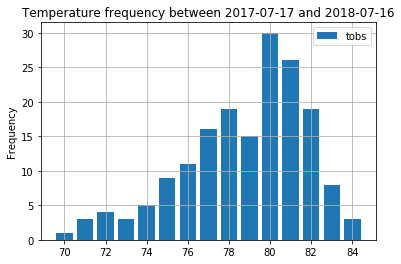

In [11]:
plt.bar(x, frequency, align = "center",label="tobs")
plt.legend(loc="best")
plt.title("Temperature frequency between 2017-07-17 and 2018-07-16")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Temperature Analysis 

In [12]:
calc_temps = pd.read_sql("SELECT MIN(tobs) AS 'Minimum temperature', AVG(tobs) AS 'Average temperature', MAX(tobs) AS 'Maximum temperature' FROM measurements WHERE date BETWEEN '2017-07-02' AND '2017-07-05'",conn)
calc_temps

,Minimum temperature,Average temperature,Maximum temperature
0,75,78.0,81


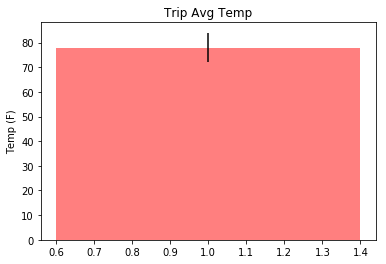

In [13]:
plt.bar(1, calc_temps["Average temperature"],color="red",alpha=0.5, yerr=calc_temps["Maximum temperature"]-calc_temps["Minimum temperature"])
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")
plt.show()

# Step 4 

In [20]:
# Precipitation
precipitation_data.set_index("date").to_dict()

{'prcp': {'2017-07-17': 0.39,
  '2017-07-18': 2.4,
  '2017-07-19': 0.27,
  '2017-07-20': 0.7,
  '2017-07-21': 0.1,
  '2017-07-22': 4.0,
  '2017-07-23': 0.8,
  '2017-07-24': 0.84,
  '2017-07-25': 0.3,
  '2017-07-26': 0.3,
  '2017-07-27': 0.0,
  '2017-07-28': 0.4,
  '2017-07-29': 0.3,
  '2017-07-30': 0.3,
  '2017-07-31': 0.0,
  '2017-08-01': 0.0,
  '2017-08-02': 0.25,
  '2017-08-03': 0.06,
  '2017-08-04': 0.0,
  '2017-08-05': 0.06,
  '2017-08-06': 0.0,
  '2017-08-07': 0.05,
  '2017-08-08': 0.34,
  '2017-08-09': 0.15,
  '2017-08-10': 0.07,
  '2017-08-11': 0.0,
  '2017-08-12': 0.14,
  '2017-08-13': 0.0,
  '2017-08-14': 0.22,
  '2017-08-15': 0.42,
  '2017-08-16': 0.42,
  '2017-08-17': 0.13,
  '2017-08-18': 0.06,
  '2017-08-19': 0.09,
  '2017-08-20': 0.01,
  '2017-08-21': 0.56,
  '2017-08-22': 0.5,
  '2017-08-23': 0.45}}

In [22]:
# List of stations
station_list = pd.read_sql("SELECT station FROM stations", conn)
station_list

,station
0,USC00519397
1,USC00513117
2,USC00514830
3,USC00517948
4,USC00518838
5,USC00519523
6,USC00519281
7,USC00511918
8,USC00516128
